<a href="https://colab.research.google.com/github/abccastro/ChatBot-Online-Flight-Booking/blob/main/passport_reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementing OCR with paddleocr**

In [ ]:
#Import necessary packages to read files from google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
#Install required paddleorc packages
!pip install paddlepaddle
!pip install paddleocr

In [7]:
from paddleocr import PaddleOCR
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [49]:
#Function to preprocess the images (preprocessing: greyscale, threshhold, denoised)
def preprocess_img_gtd(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Convert image into greyscale
  th ,threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC) #Binarize image where text is in black and the background is in white
  denoised_image = cv2.GaussianBlur(threshed, (3,3),0)
  return denoised_image

#Function to preprocess the images excluding threshold
def preprocess_img_gd(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # th ,threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
  denoised_image = cv2.GaussianBlur(gray, (3,3),0)
  return denoised_image

[2023/11/04 02:42:26] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

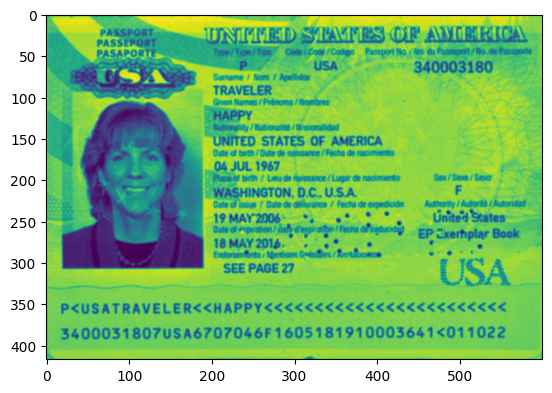

In [38]:
ocr = PaddleOCR()

image = cv2.imread("/content/drive/MyDrive/Passport_dataset/US/340003180.jpeg")

# Perform OCR on the preprocessed image
result = ocr.ocr(preprocess_img_gd(image))

# Extract and print the recognized text
recognized_text = '\n'.join([line[1][0] for line in result[0] if line[1][1]>0.6])
print(recognized_text)
plt.imshow(preprocess_img_gd(image))

In [9]:
# paddleorc model outputs vertices of recongnized texts from the images along with the texts and confidence value
print(result)

[[[[[90.0, 42.0], [152.0, 45.0], [152.0, 59.0], [90.0, 57.0]], ('PASSPORT', 0.9948785305023193)], [[[275.0, 34.0], [347.0, 34.0], [347.0, 52.0], [275.0, 52.0]], ('CANADA', 0.995388925075531)], [[[86.0, 61.0], [155.0, 61.0], [155.0, 72.0], [86.0, 72.0]], ('PASSEPORT', 0.9966309070587158)], [[[76.0, 74.0], [165.0, 74.0], [165.0, 88.0], [76.0, 88.0]], ('DIPLOMATIQUE', 0.992229700088501)], [[[211.0, 66.0], [261.0, 66.0], [261.0, 81.0], [211.0, 81.0]], ('Type/Type', 0.9767537713050842)], [[[211.0, 83.0], [225.0, 83.0], [225.0, 97.0], [211.0, 97.0]], ('P', 0.9554523825645447)], [[[293.0, 84.0], [330.0, 84.0], [330.0, 99.0], [293.0, 99.0]], ('CAN', 0.9975223541259766)], [[[455.0, 88.0], [568.0, 88.0], [568.0, 105.0], [455.0, 105.0]], ('EF3QQ233', 0.9377593994140625)], [[[211.0, 111.0], [286.0, 114.0], [286.0, 131.0], [210.0, 129.0]], ('MARTIN', 0.995943009853363)], [[[211.0, 130.0], [262.0, 130.0], [262.0, 142.0], [211.0, 142.0]], ('Givennam', 0.9944072365760803)], [[[212.0, 145.0], [274.0, 1

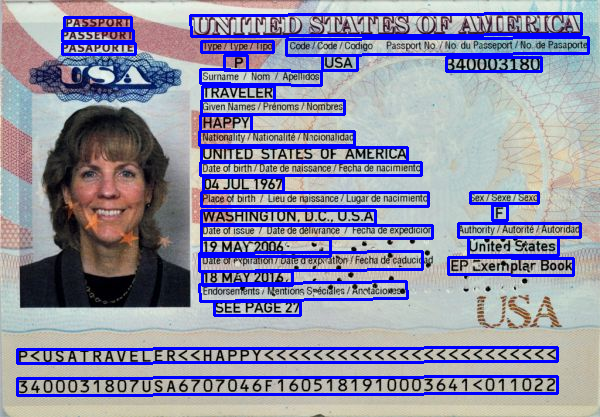

In [33]:
# Iterate over the recognized text regions and draw bounding boxes and text annotations
for line in result[0]:
  if line[1][1]>0.6: #
    text = line[1][0]
    x1, y1 = map(int, line[0][0])
    x2, y2 = map(int, line[0][1])
    x3, y3 = map(int, line[0][2])
    x4, y4 = map(int, line[0][3])

    # Create a NumPy array for the coordinates with dtype specified
    pts = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]], dtype=np.int32)

    cv2.polylines(image, [pts], isClosed=True, color=(255, 0, 0), thickness=2)

    # cv2.putText(image, text, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Display the image with recognized text
cv2_imshow(image)
# cv2.destroyAllWindows()


Running Spell Checker on extracted data

In [ ]:
!pip install pyspellchecker

In [28]:
# Post processing of extracted data from ORC model
from spellchecker import SpellChecker

# Initialize a spell checker
spell = SpellChecker()

# Split the extracted text into words
words =recognized_text.split()
# print(words)
# Correct spelling errors using the spell checker
corrected_text = []
for word in words:
    # Check if the word is misspelled
    if word in spell.unknown([word]):
        # If it's misspelled, replace it with the suggested correction
        corrected_word = spell.correction(word)
        corrected_text.append(corrected_word)
    else:
        # If it's correctly spelled, keep it as is
        corrected_text.append(word)

corrected_text = [word for word in corrected_text if word is not None]

# Reconstruct the corrected text
corrected_text = '\n'.join(corrected_text)

# Print the corrected text
print( corrected_text)

PASSPORT
UNITEDSTATESOFAMIERICA
PASSEPORT
PASAPORTE
Type/Type/Tipo
Code/Code/CodigoPassport
No./No
duPasoeport/No.dePasaporte
P
USA
340003180
Surname
/Nom/Apellidos
TRAVELER
GivenNames/Prenoms/Nombres
HAPPY
Nationality/Nationalite/Nncionalidad
UNITED
STATESOF
AMERICA
Date
of
birth/Date
denaissance/Fechade
04JUL1967
Place
of
birth/Lieu
de
raissance/Lugar
de
Sex/Sexe/Sexo
WASHINGTON.D.C.,U.S.A
F
Date
ofissue/Date
dedelivrance/Fechade
expedition
Authority/Auforite/Autoridad
19MAY2006
Unite'd'States
Dateprtn/expFech
EPLxernplarBook
18MAY2016.
Endorenents/MentiongSmcles/Antacio
SEEPAGE27
P<USATRAVELER<<HAPPY<<<<<<<<<<<<<<<<<<<<<<<<
3400031807USA6707046F1605181910003641<011022


**Implementing OCR with pytesseract model**

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

In [40]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

 

Passtpont PIT ED Stat
PASAPORTE TWwe/Tipe Teo Cote! Cora ?
Bf Ne P ons ppsron OOM 340003180
TRAVELER
HAPPY
2 UNITED STATES OF AMERICA

04 JUL 1967
WASHINGTON oc USA F
19 MAY 2006+, = Og co : “Gnited States

    

° + EP Cxemplar
18 MAY 2016 EF, srertiplar Book

SEE PAGE 27

P<USATRAVELERS<HAPPY <<<<K<< KKK KKK KKK KKK KKK KKK
3400031807USA6707046F 1605181910003641<011022



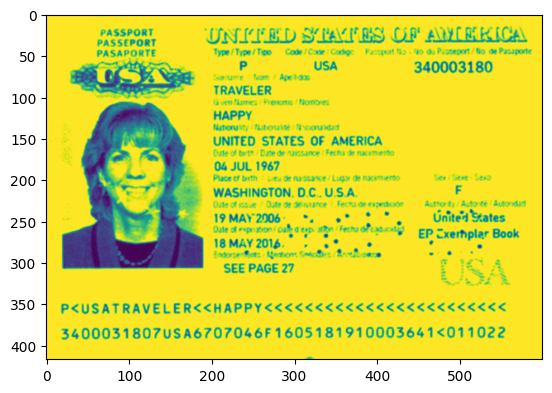

In [50]:
img = cv2.imread("/content/drive/MyDrive/Passport_dataset/US/340003180.jpeg")
text1 = pytesseract.image_to_data(preprocess_img_gtd(img),output_type='data.frame', lang='eng')
text2 = pytesseract.image_to_string(preprocess_img_gtd(img), lang="eng")
plt.imshow(preprocess_img_gtd(img))

print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

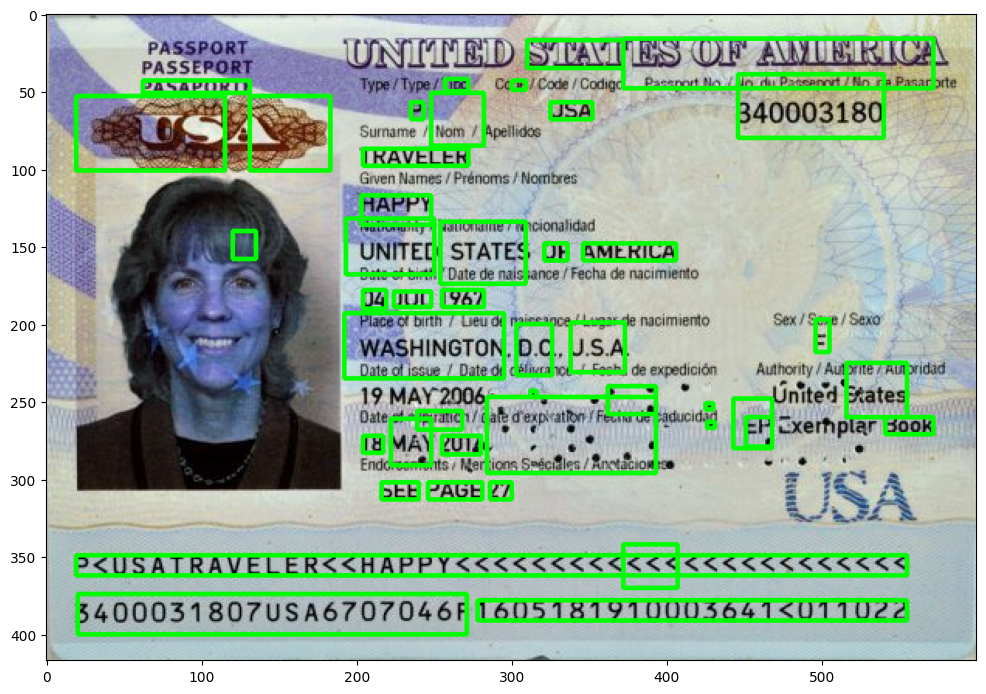

In [ ]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 20:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)

tesseract orc with different image preprocessing

 

asstPORT UNUAEDD, Si LAA Wes OW put ert

PASSEPORT

 

Trl tiple” ce» Cam Case ©
’ usa

srame (Nom / Ageides

TRAVELER

Gren Mares Prec / Nees

HAPPY

ee are ccnuted

UNITED) STATES OF SMERICA
Die encarta or racer

ga 00 (¥67

Pie drt 7 v8 tpeennce, Lge te raceerto

WASHINGTON. D.C, J.S.A

Date isu / Die. ceok- Roohl 6 expciciin

12 MAY 2006 wf
ah ‘

 

      

SEE PAGE 27

ros aT Fae

340003180

Aerts ute aut
Unites “fates
=H Cxerhplar 300k

 

SKUSATRAVELERS<HAPPY <S<<< £555 << KEKE
3400031807USA6707046F 1605181910005641<U11022



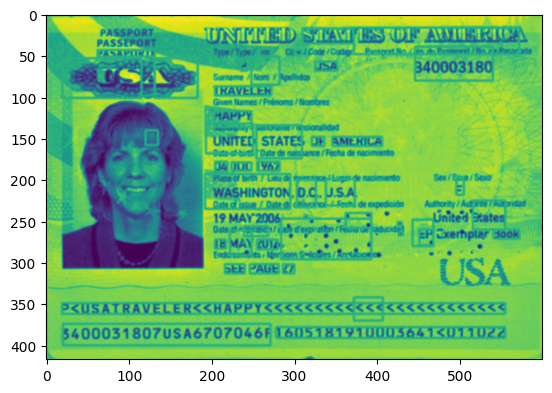

In [53]:
text1 = pytesseract.image_to_data(preprocess_img_gtd(img),output_type='data.frame', lang='eng')
text2 = pytesseract.image_to_string(preprocess_img_gd(img), lang="eng")
plt.imshow(preprocess_img_gd(img))

print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()